La régression logistique porte assez mal son nom car il ne s’agit pas à proprement parler d’une régression au sens classique du terme (on essaye pas d’expliquer une variable quantitative mais de classer des individus dans deux catégories). Cette méthode présente depuis de nombreuses années est la méthode la plus utilisée aujourd’hui en production pour construire des scores. En effet, ses atouts en ont fait une méthode de référence.
### Quels sont ses atouts ?:


*   **La simplicité du modèle :** il s’agit d’un modèle linéaire, la régression logistique est un cas particulier du modèles linéaire généralisé dans lequel on va prédire la probabilité de la réponse 1 plutôt que la valeur directement (0 ou 1).
*   **La simplicité d’interprétation :** le modèle obtenu est un modèle linéaire, c’est-à-dire qu’on obtient des coefficients associés à chaque variable explicative qui permettent de comprendre l’impact de chaque variable sur le choix (entre 0 et 1).


*   **La disponibilité :** cette méthode est disponible dans tous les logiciels classiques de traitement de données (SAS, SPSS…).

*   **La robustesse du modèle :** ce modèle étant très simple, il y a peu de risque de sur-apprentissage et les résultats ont tendance à avoir un bon pouvoir de généralisation.

Tous ces points ont permis à cette méthode de s’imposer comme une référence en classification binaire. Dans le cadre de cet article, nous n’aborderons que le cas binaire, il existe des modèles logistiques pour classer des variables ordinales (modèle logistique ordinal) ou nominales à plus de 2 modalités (modèle logistique multinomial). Ces modèles sont plus rarement utilisés dans la pratique.







## Les outils en python pour appliquer la régression logistique
Il existe de nombreux packages pour calculer ce type de modèles en python mais les deux principaux sont scikit-learn et statsmodels.

**Scikit-learn** est le principal package de machine learning en python, il possède des dizaines de modèles dont la régression logistique. En tant que package de machine learning, il se concentre avant tout sur l’aspect prédictif du modèle de régression logistique, il permettra de prédire très facilement mais sera pauvre sur l’explication et l’interprétation du modèle. Par contre, pour la validation de la qualité prédictive des modèles, l’ajustement des hyper-paramètres et le passage en production de modèles, il est extrêmement efficace.

**Statsmodels** est quant à lui beaucoup plus orienté modélisation statistique, il possédera des sorties plus classiques pouvant ressembler aux logiciels de statistiques « classiques ». Par contre, le passage en production des modèles sera beaucoup moins facilité. On sera plus sur de l’explicatif.



## Régression Logistique sur le Jeu de Données du Diabète avec MinMaxScaler
Ce projet démontre l'utilisation de la régression logistique pour prédire la probabilité de diabète chez les patients en fonction de divers indicateurs de santé. Le jeu de données est prétraité avec MinMaxScaler pour garantir que toutes les caractéristiques contribuent de manière égale aux prédictions du modèle.

## Aperçu
**Objectif :** Développer un modèle prédictif permettant d'identifier si un patient est diabétique en fonction de ses données médicales.

**Jeu de données :** diabetes.csv, contenant des informations telles que les niveaux de glucose, l'IMC, les niveaux d'insuline et l'âge.

**Prétraitement :** Application de MinMaxScaler pour normaliser les valeurs des caractéristiques entre 0 et 1, améliorant ainsi l'efficacité du modèle de régression logistique.

**Modélisation :** Utilisation de la Régression Logistique pour la classification binaire des catégories diabétique et non diabétique.

In [ ]:
# Charger le jeu de données avec les noms de colonnes spécifiés
import pandas as pd
data = pd.read_csv('/diabetes.csv', header=None, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Diabetes', 'Age', 'Class'])
data.sample(5)  # Afficher des échantillons aléatoires du jeu de données

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Class
262,4,95,70,32,0,32.1,0.612,24,0
698,4,127,88,11,155,34.5,0.598,28,0
763,10,101,76,48,180,32.9,0.171,63,0
338,9,152,78,34,171,34.2,0.893,33,1
63,2,141,58,34,128,25.4,0.699,24,0


In [ ]:
data.shape

(768, 9)

In [ ]:
# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop('Class', axis=1)
y = data['Class']
'''# autrement
X = df.iloc[:, :-1]
y = df.iloc[:, -1]'''

'# autrement\nX = df.iloc[:, :-1]\ny = df.iloc[:, -1]'

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Diabetes  Age  
0       0.627   50  
1       0.351   31  
2       0.672   32  
3       0.167   21  
4     

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64


In [ ]:
# Mettre à l'échelle les caractéristiques en utilisant MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
Xscaled = ms.fit_transform(X)

MinMaxScaler est une technique de normalisation qui redimensionne les valeurs d’un ensemble de données pour qu'elles soient comprises dans une plage spécifiée, généralement entre 0 et 1. Cela peut aider les modèles de machine learning, notamment ceux qui utilisent la distance entre les points de données, en veillant à ce que toutes les caractéristiques aient un impact équivalent.

### Fonctionnement
Pour chaque valeur x d'une caractéristique, MinMaxScaler applique la transformation suivante :

Xscaled = (X-Xmin)/(Xmax-Xmin)

**Xmin et Xmax:** Les valeurs minimale et maximale de la caractéristique dans les données d’entraînement.

**Xscaled:** La nouvelle valeur normalisée de x, généralement entre 0 et 1.




In [ ]:
print(Xscaled)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [ ]:
# Diviser le jeu de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.25)
xstrain, xstest, ystrain, ystest = train_test_split(Xscaled, y, random_state=1, test_size=0.25)

* **train_test_split** divise les données en ensembles d'entraînement et de test.

* **xtrain, xtest, ytrain, et ytest**  représentent les ensembles sans mise à l’échelle.
* **xstrain, xstest, ystrain, et ystest** représentent les ensembles de données mises à l'échelle.
* La variable** test_size=0.25** signifie que 25 % des données sont réservées pour l’évaluation du modèle.

In [ ]:
# Entraînement du modèle de Régression Logistique :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model2 = LogisticRegression()

Cette étape initialise deux modèles de régression logistique (model et model2).
Ensuite, le modèle model est entraîné avec les données non mises à l’échelle (xtrain, ytrain).

In [ ]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

La méthode model.fit(xtrain, ytrain) entraîne un modèle de régression logistique en utilisant les données d'entraînement (xtrain et ytrain). L'output de cette méthode est le modèle entraîné, c'est-à-dire l'objet du modèle de régression logistique lui-même (model). Cette méthode ne renvoie pas de valeur spécifique à afficher, mais elle ajuste les coefficients du modèle (les poids des caractéristiques) pour qu'il puisse prédire les résultats en fonction des données d'entrée.

In [ ]:
model2.fit(xstrain, ystrain)


LogisticRegression()

In [ ]:
# Faire des prédictions sur les données de test
predictions = model.predict(xtest)
predictions2 = model2.predict(xstest)

model.predict(xtest) : Cette ligne fait des prédictions sur l'ensemble de test (xtest) en utilisant le modèle model qui a été entraîné avec les données non mises à l’échelle. Le résultat (predictions) est un tableau contenant les prédictions de classe pour chaque échantillon de l'ensemble de test.

In [ ]:
# Afficher les probabilités des prédictions
print(model.predict_proba(xtest)[0:10])

[[0.57826983 0.42173017]
 [0.67671273 0.32328727]
 [0.84995477 0.15004523]
 [0.95110602 0.04889398]
 [0.7904452  0.2095548 ]
 [0.71895874 0.28104126]
 [0.62547463 0.37452537]
 [0.89725918 0.10274082]
 [0.84149089 0.15850911]
 [0.79090742 0.20909258]]


In [ ]:
print(model2.predict_proba(xstest)[0:10])

[[0.51839221 0.48160779]
 [0.69511195 0.30488805]
 [0.79073557 0.20926443]
 [0.88854553 0.11145447]
 [0.74447783 0.25552217]
 [0.74545891 0.25454109]
 [0.66971023 0.33028977]
 [0.83446315 0.16553685]
 [0.80793305 0.19206695]
 [0.77845652 0.22154348]]


## différences:
Impact sur les prédictions

**model.predict_proba(xtest) :** Utilise le modèle qui a été formé sur les données non mises à l'échelle. Les probabilités retournées par ce modèle peuvent être influencées par la disparité dans les plages de valeurs des caractéristiques.

**model2.predict_proba(xstest) :** Utilise le modèle qui a été formé sur les données mises à l'échelle. Les probabilités retournées par ce modèle devraient théoriquement être plus stables et plus cohérentes, car les caractéristiques sont maintenant comparées sur une échelle égale.

In [ ]:
# Evaluation du modèle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy without scaling:", accuracy_score(ytest, predictions))
print("Accuracy with scaling:", accuracy_score(ystest, predictions2))

Accuracy without scaling: 0.7760416666666666
Accuracy with scaling: 0.7708333333333334


Cela signifie que le modèle entraîné avec les données mises à l'échelle (model2) a obtenu une meilleure précision que le modèle entraîné avec les données non mises à l'échelle (model), ce qui est souvent le cas lorsque les caractéristiques sont mises à l'échelle correctement. La mise à l'échelle permet au modèle de mieux s'adapter aux données et d'éviter qu'une caractéristique avec une grande plage de valeurs ne domine le modèle.

In [ ]:
print("Confusion Matrix without scaling:\n", confusion_matrix(ytest, predictions))
print("Confusion Matrix with scaling:\n", confusion_matrix(ystest, predictions2))

Confusion Matrix without scaling:
 [[109  14]
 [ 29  40]]
Confusion Matrix with scaling:
 [[110  13]
 [ 31  38]]


Une matrice de confusion est un tableau qui montre comment les prédictions du modèle se comparent aux vraies valeurs. Pour une classification binaire (par exemple, présence ou absence de diabète), la matrice de confusion est généralement de la forme suivante :
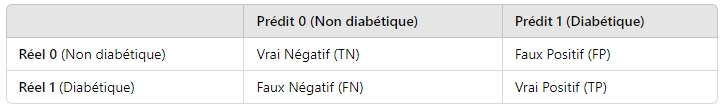

Vrai Positif (TP) : Nombre de cas correctement prédits comme positifs (diabétiques).

Faux Positif (FP) : Nombre de cas incorrectement prédits comme positifs.

Faux Négatif (FN) : Nombre de cas incorrectement prédits comme négatifs.

Vrai Négatif (TN) : Nombre de cas correctement prédits comme négatifs (non diabétiques).



La matrice de confusion vous permet de mieux comprendre non seulement le taux de précision global (accuracy) du modèle, mais aussi les erreurs spécifiques que le modèle commet :

Faux Positifs (FP) : Les cas où le modèle a prédit incorrectement la classe positive.

Faux Négatifs (FN) : Les cas où le modèle a prédit incorrectement la classe négative.

In [ ]:
print("Classification Report without scaling:\n", classification_report(ytest, predictions))
print("Classification Report with scaling:\n", classification_report(ystest, predictions2))

Classification Report without scaling:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

Classification Report with scaling:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       123
           1       0.75      0.55      0.63        69

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



Le rapport de classification fournit les statistiques suivantes pour chaque classe (dans ce cas, les classes 0 et 1, représentant les non-diabétiques et diabétiques) :



*   **Précision (Precision) :** La proportion des prédictions positives correctes parmi toutes les prédictions positives effectuées.
*   **Rappel (Recall) :** La proportion des instances positives qui ont été correctement identifiées par le modèle.


*   **F-score (F1-score) :** La moyenne harmonique de la précision et du rappel. C'est une mesure qui équilibre la précision et le rappel, particulièrement utile quand il y a un déséquilibre entre les classes.
*   **Support :** Le nombre d'échantillons dans chaque classe.




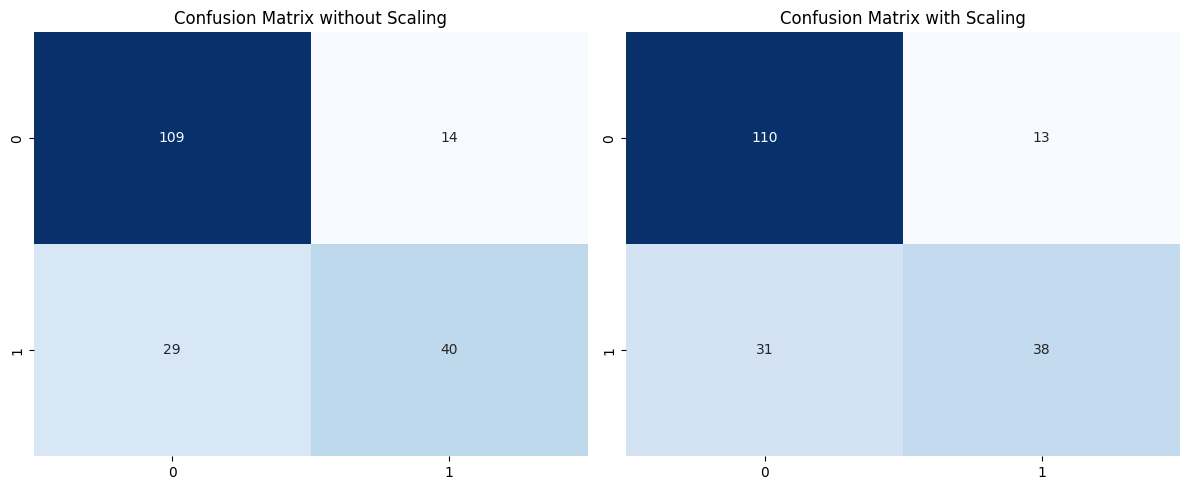

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# Visualisation des matrices de confusion
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('Confusion Matrix without Scaling')
sns.heatmap(confusion_matrix(ystest, predictions2), annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=False)
ax[1].set_title('Confusion Matrix with Scaling')
plt.tight_layout()
plt.show()

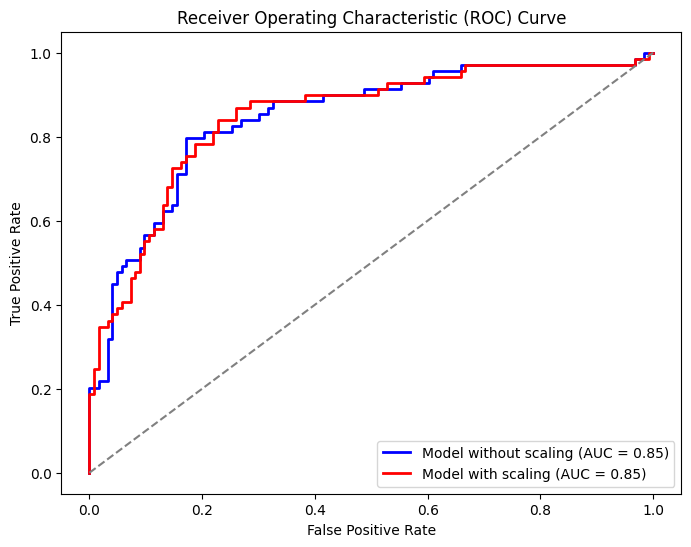

In [ ]:
# Visualisation de la courbe ROC et AUC
fpr1, tpr1, _ = roc_curve(ytest, model.predict_proba(xtest)[:, 1])
fpr2, tpr2, _ = roc_curve(ystest, model2.predict_proba(xstest)[:, 1])

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model without scaling (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Model with scaling (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Courbe ROC et AUC :

**La courbe ROC (Receiver Operating Characteristic)** est tracée pour chaque modèle. Cette courbe compare le taux de vrais positifs (True Positive Rate) et le taux de faux positifs (False Positive Rate).

**L'AUC (Area Under the Curve)** est également calculée et affichée dans la légende, ce qui donne une indication de la capacité du modèle à discriminer entre les classes. Une AUC plus proche de 1 indique un modèle meilleur.